## Import necessary libraries


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import numpy as np

## Load the dataset


In [3]:
iris = pd.read_csv('Iris.csv')

## Check the first few rows of the dataset


In [4]:
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [6]:
iris = iris.drop(columns=['Id'])

## Split the data into features (X) and target (y)


In [8]:
x=iris.iloc[:,:-1]
y=iris.iloc[:,-1]

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

## Split the dataset into training and testing sets


In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Convert the data into the format required by XGBoost (DMatrix)


In [14]:

# Use the encoded labels when creating DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [18]:
df = pd.DataFrame({
    'Encoded Values': y_train.tolist(),
    'Original Values': y_train.tolist()  # Use y_train for both columns to compare
})

df

,Encoded Values,Original Values
0,1,1
1,2,2
2,2,2
3,1,1
4,2,2
...,...,...
100,1,1
101,2,2
102,0,0
103,1,1


## Set up the parameters for the XGBoost model


In [19]:
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 3,  # Number of classes in the target variable (iris dataset has 3 classes)
    'max_depth': 3,  # Maximum depth of the trees
    'eta': 0.3,  # Learning rate
    'eval_metric': 'mlogloss'  # Evaluation metric: multi-class logarithmic loss
}

## Train the model


In [20]:
bst = xgb.train(params, dtrain, num_boost_round=100)

## Make predictions

In [21]:
y_pred = bst.predict(dtest)

## Evaluate the accuracy


In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


# Optional: Feature Importance Plot

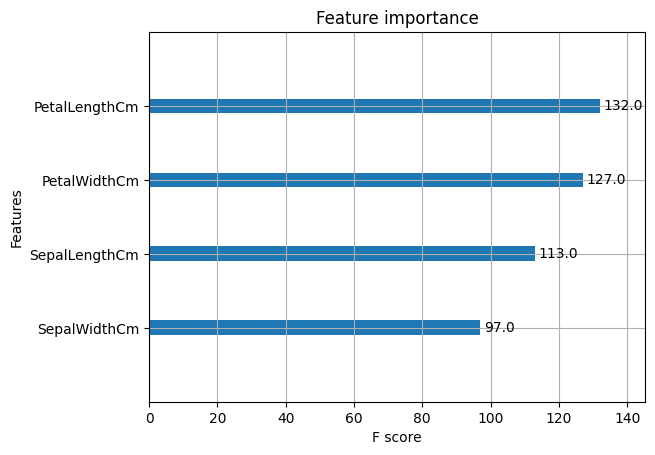

In [23]:
xgb.plot_importance(bst)
import matplotlib.pyplot as plt
plt.show()